# Decision Trees


In this notebook, we'll delve into the Decision Tree algorithm, a versatile tool widely used in supervised learning tasks. Decision Trees offer an intuitive approach to classification and regression by recursively partitioning the feature space based on attribute values.   

To showcase the effectiveness of this algorithm, we'll apply it to the Penguin dataset. This dataset comprises various measurements of penguin species, making it an excellent choice for illustrating Decision Tree's capabilities. Through this exploration, we aim to gain insights into Decision Tree principles and their practical applications in predictive modeling.

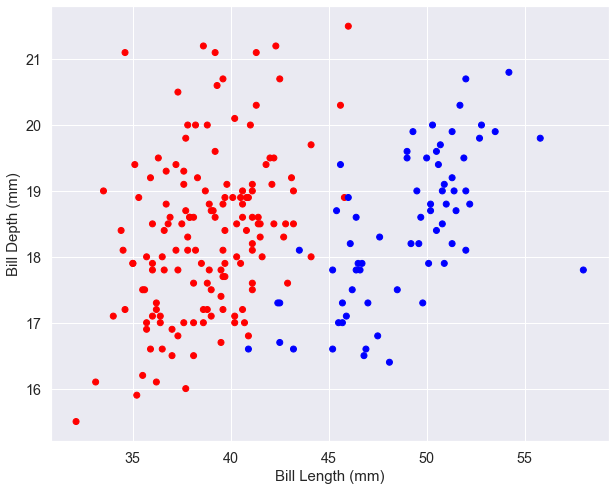

In [19]:
# Importing necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load the Palmer Penguins dataset.
penguins = sns.load_dataset("penguins")

# Drop rows with missing values.
penguins = penguins.dropna()

# Keep only two species for convenience.
penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]

# Extract features and target variable.
X = penguins[['bill_length_mm', 'bill_depth_mm']].values
y = penguins['species'].map({'Adelie': 0, 'Chinstrap': 1}).values

# Set colors based on the species label.
colors = ["red" if label == 0 else "blue" for label in y]

# Plot the data.
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Bill Length (mm)", fontsize=15)
plt.ylabel("Bill Depth (mm)", fontsize=15)
plt.grid(True)
plt.show()


---

To accomplish machine learning tasks effectively, it's essential to divide our data into training and testing sets. This division can be achieved using the ```sklearn.model_selection.train_test_split()``` function. Execute the code cell below to perform this split and visualize the training data.

---

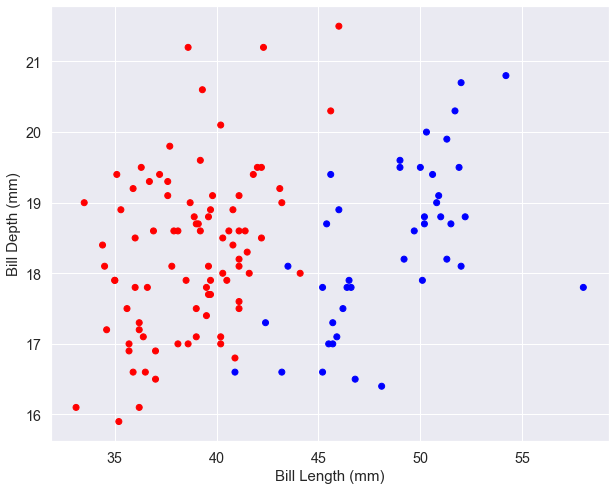

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets.
# Here, X_train and y_train will be our training features and labels, 
# while X_test and y_test will be our testing features and labels.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=42)

# Set colors for training points.
# We assign red color to label 0 (Adelie) and blue color to label 1 (Chinstrap).
c_train = ["red" if label == 0 else "blue" for label in y_train]

# Plot the training set.
# This visualization displays the distribution of the training data points 
# based on their bill length and bill depth.
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("Bill Length (mm)", fontsize=15)
plt.ylabel("Bill Depth (mm)", fontsize=15)
plt.grid(True)
plt.show()


---

Afterwards, we create a new instance of the ```sklearn.tree.DecisionTreeClassifier``` model. For more information about this class, please refer to the official documentation. Then, we proceed to train the model using the fit() method. You can see this process by executing the code cell below.

---

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier.
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the decision tree classifier on the training data.
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

---

After training our model, we can display the tree structure of the current model using the ```sklearn.tree.plot_tree()``` function. An illustration of this is provided in the code cell below

---

|--- feature_0 <= 42.35
|   |--- feature_1 <= 16.70
|   |   |--- feature_0 <= 38.95
|   |   |   |--- class: 0
|   |   |--- feature_0 >  38.95
|   |   |   |--- class: 1
|   |--- feature_1 >  16.70
|   |   |--- class: 0
|--- feature_0 >  42.35
|   |--- feature_0 <= 44.65
|   |   |--- feature_1 <= 17.65
|   |   |   |--- class: 1
|   |   |--- feature_1 >  17.65
|   |   |   |--- feature_0 <= 43.35
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  43.35
|   |   |   |   |--- feature_0 <= 43.80
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  43.80
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  44.65
|   |   |--- feature_1 <= 21.15
|   |   |   |--- feature_1 <= 20.15
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  20.15
|   |   |   |   |--- feature_0 <= 48.65
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  48.65
|   |   |   |   |   |--- class: 1
|   |   |--- feature_1 >  21.15
|   |   |   |--- class: 0
 



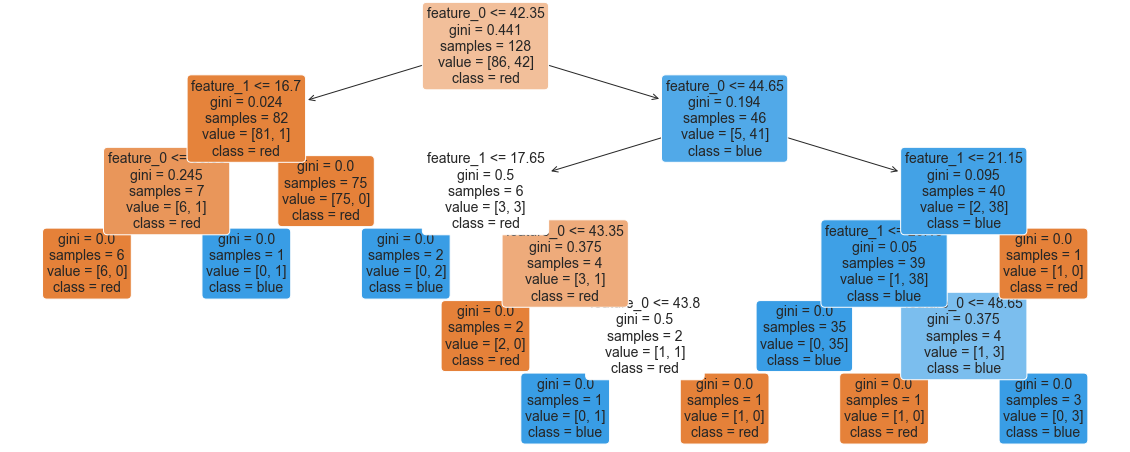

In [22]:
# Export the decision tree rules as text.
tree_rules = export_text(decision_tree, feature_names=["feature_0", "feature_1"])
# Print the exported decision tree rules.
print(tree_rules, "\n")

# Plot the decision tree.
plt.figure(figsize=(20, 8))  # Set the figure size.
# Plot the decision tree with specified parameters.
plot_tree(decision_tree,
          feature_names=["feature_0", "feature_1"],  # Specify feature names.
          class_names=["red", "blue"],  # Specify class names.
          rounded=True,  # Round node corners.
          filled=True,  # Fill nodes with colors.
          fontsize=14)  # Set font size for text.
# Display the plot.
plt.show()



---

The illustration above presents a tree structure used for making predictions in a graph-theoretic manner. Imagine you want to predict an outcome based on a given feature vector $x = [x_0, x_1]^T$.  

Here's how you can do it:

1. Begin at the root node (at the top of the tree).  
2.  If $x_0 \le 42.35$, move to the left child node of the root (at depth 1, on the left); otherwise, move to the right child node of the root (at depth 1, on the right).  
3. Repeat the process (as shown in step 2) of traversing to successive child nodes based on satisfying the Boolean condition specified at each parent node until reaching a leaf node (a node without child nodes).  
4. The predicted class of this leaf node will be the predicted class for our feature vector $x = [x_0, x_1]^T$.  

We can visualize the decision regions generated by our trained decision tree using the following code cell.


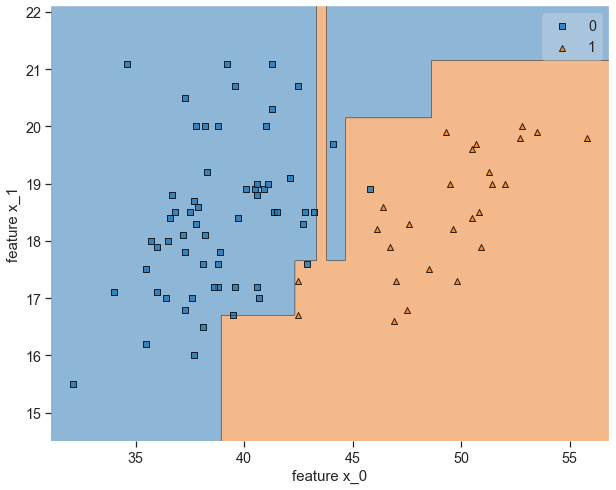

In [23]:
# Import the necessary libraries for plotting decision regions.
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Create a figure with specified size for plotting.
plt.figure(figsize=(10, 8))

# Plot decision regions using the trained decision tree classifier.
plot_decision_regions(X_test, y_test, clf=decision_tree)

# Set labels for the x-axis and y-axis.
plt.xlabel("feature x_0", fontsize=15)
plt.ylabel("feature x_1", fontsize=15)

# Add gridlines to the plot.
plt.grid()

# Display the plot.
plt.show()



---
Next, we assess the performance of our machine learning models on the testing dataset by executing the following two code cells.

---

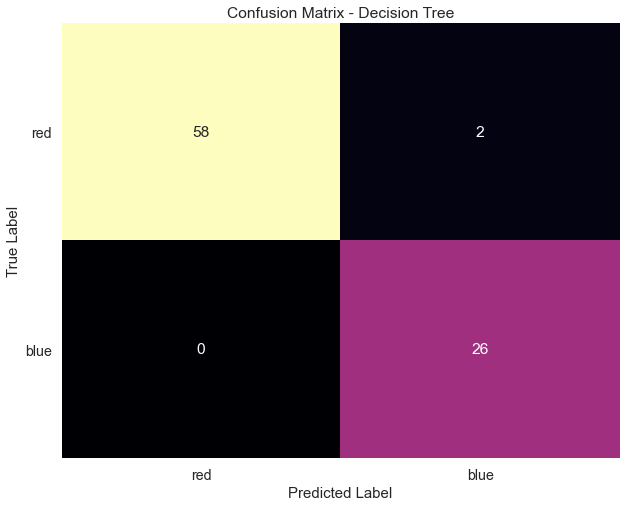

In [24]:
# Predicted values on the testing data.
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn.
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn.
import seaborn as sns

# The confusion matrix.
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe.
matrix_df = pd.DataFrame(confusion_matrix)

# Create a heatmap for visualization.
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot=True,  # Add annotations.
            fmt="g",  # Format of annotations.
            ax=ax,
            cmap="magma",  # Color map.
            cbar=False)  # Disable color bar.

# Set title and axis labels.
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])  # Labels for x-axis ticks.
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)  # Labels for y-axis ticks.
plt.show()



In [25]:
# Import classification report from sklearn.metrics.
from sklearn.metrics import classification_report

# Predicted values on the testing data.
y_pred = decision_tree.predict(X_test)

# Checking performance of our model with classification report.
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.93      1.00      0.96        26

    accuracy                           0.98        86
   macro avg       0.96      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86



---
Based on the classification report, the decision tree model exhibits strong performance across all metrics. With high precision, recall, and F1-score values for both classes, the model demonstrates excellent capability in correctly identifying and classifying instances from the test data. The high accuracy score further validates the model's effectiveness, indicating that it correctly predicts the class labels for a significant portion of the test dataset. Overall, these results suggest that the decision tree model is highly accurate and reliable for the given classification task, making it a robust choice for predicting the target classes in similar datasets.

---